# Step 1 Importing libraries 

We are predicting the profit using 1000_Companies data set 
First we have to import all the libraries required then we have to start coding.

So first we will import numpy, pandas, matplotlib, seaborn, io for file reading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns        #seaborn always works on matplot library so before using seaborn we have to import matplotlib
import io


# Step 2 Obtaining Data Set

Now we have all the libraries imported, now we have to upload the data set, there are many ways we can upload the dataset one way is as shown

In [ ]:
from google.colab import files
uploaded = files.upload()       # for importing files 

df = pd.read_csv(io.BytesIO(uploaded['1000_Companies.csv']))        # converting the files into data frame, I have downloaded it before 
print(df.head())

Saving 1000_Companies.csv to 1000_Companies (15).csv
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


# Step 3 Observing the dataset

Now after importing the data set, we have to look into the data set by printing the dataset or printing only first 5 rows to know what columns are present and what labels we are going to use to estimate the hypothesis 

In [ ]:

Y = df.iloc[:,4].values                              #  taking all rows : but taking only 5th column indexing starts from 0 as we want to predict this value
X = df.iloc[:, :-1].values                                #  taking all rows : here but taking only till 4th column but not taking last column
# print(X)


# Step 4  Graphs

Here we will look into the relation between the variables, correlation, covariance etc between the labels of the data set by plotting the correlation heatmap in seaborn library

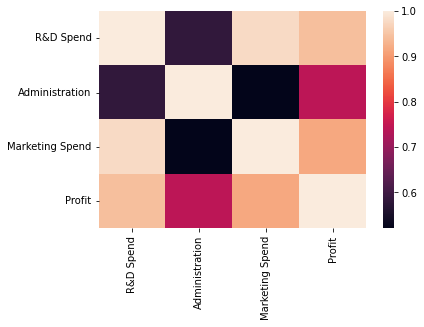

In [ ]:
# data visualisation 
# builidng the correlation matrix 
# seaborn uses matplotlib recognises the dataframe and put into sea born

sns.heatmap(df.corr())

#look at the graph we can infer a lot between variables this gives the correlation between the variables 
# we do not need graphs or plots of these we need to set up or build a data for our model 

# Step 5     Encoding Categorical Data 

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

# Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Suppose we have a column Height in some dataset, with entries in it as tall, small, medium we encode it as 3,1,2 respectively that way. For suppose if we have male and female in gender column

# Limitation of label Encoding 
Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues in the training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.

# Example
An attribute having output classes Mexico, Paris, Dubai. On Label Encoding, this column lets Mexico is replaced with 0, Paris is replaced with 1, and Dubai is replaced with 2. 
With this, it can be interpreted that Dubai has high priority than Mexico and Paris while training the model, But actually, there is no such priority relation between these cities here.

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Male and Female mapped to 0 and 1. But this can add bias in our model as it will start giving higher preference to the Female parameter as 1>0 and ideally both labels are equally important in the dataset. To deal with this issue we will use One Hot Encoding technique.

# One Hot Encoding:
In this technique, the categorical parameters will prepare separate columns for both Male and Female labels. So, wherever there is Male, the value will be 1 in Male column and 0 in Female column, and vice-versa. Let’s understand with an example: Consider the data where fruits and their corresponding categorical values and prices are given.

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
"use the ColumnTransformer instead.", DeprecationWarning)  so we use columntransfer as shown 

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()                                             # created a variable so that can use later
X[:, 3] = labelencoder.fit_transform(X[:, 3])
ct = ColumnTransformer([("State", OneHotEncoder(),[3])], remainder="passthrough")
ct.fit_transform(X)   
print(X) 


[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 ...
 [100275.47 241926.31 227142.82 0]
 [128456.23 321652.14 281692.32 0]
 [161181.72 270939.86 295442.17 2]]


In [ ]:
#X = X[:, 1:]
print(X)

# if we see fourth column is changed to numericals instead of words 

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 ...
 [100275.47 241926.31 227142.82 0]
 [128456.23 321652.14 281692.32 0]
 [161181.72 270939.86 295442.17 2]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)         # taking 0.3 which means 300 as test size we can even take 0.2 it gave 91.1% accuracy

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 89229.84240672  87863.57359396  94344.10707643 175895.22780744
  82980.10370555 110194.56108429 131145.70101021  90915.96765644
 164327.69446375  53192.42691382  66343.76579396 150730.60351131
 126428.6376229   58716.22001532 177128.4726056   74868.47412819
 118347.71223061 164163.10652744 175361.94494987 181834.67901715
 123931.93385785  85100.94211769 181217.57120963  83573.02539329
 104475.47586626 100695.66614769  55869.41048033  56396.76116702
  68293.85868702 211295.84575218 120883.34880413 111207.9392621
 101092.40806137 138097.99134639  63357.57857647 108335.2495546
 185788.17407412 171648.53078766 174856.55395055 117769.90686372
  96326.37421582 165042.71190733 107199.41503089  50158.08929082
 116609.99719297  58009.44033117 158596.32198653  78561.69056487
 159910.14115752 131263.20822855 185113.45777499 174821.30101551
  93192.79566122  77899.37238042 180508.82221402  84493.65299022
 143049.74835815 170361.11676696  83935.37411825 104919.50834711
 141806.43514537  52033.987

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.28077058e-01  9.78263293e-01  9.70601727e-02 -2.78834327e+02]


In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

-65740.27690882169


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9310910297784432